In [0]:
import keras
import numpy as np
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential, load_model
import matplotlib.pylab as plt
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import pickle
import os

In [0]:
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [0]:
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem1/models"
!cd / && mkdir -p "/content/gdrive/My Drive/neural_networks/hw1/problem1/datasets"
!cd / && wget -nc "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv" -O "/content/gdrive/My Drive/neural_networks/hw1/problem1/datasets/pima.csv"

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
chdir: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
chdir: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
chdir: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
File ‘/content/gdrive/My Drive/neural_networks/hw1/problem1/datasets/pima.csv’ already there; not retrieving.


In [0]:
os.chdir('/content/gdrive/My Drive/neural_networks/hw1/problem1')

dataset_path = 'datasets/pima.csv'
data = pd.read_csv(dataset_path).values

X = data[:,:-1]
Y = data[:,-1:].flatten()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=64)

print("train data: ", x_train.shape)
print("test data: ", x_test.shape)

train data:  (690, 8)
test data:  (77, 8)


In [0]:
batch_size = 50
epochs = 100
np.random.seed(1000)

In [0]:
model = Sequential()
model.add(Dense(12, activation='relu'))
model.add(Dense(8,  activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss=keras.losses.binary_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# class ModelSave(keras.callbacks.Callback):
#     output_file = 'models/modelsave-latest-model'
#     best_model_file = 'models/modelsave-best-model'
    
#     def on_train_begin(self, logs={}):
#         self.max_accuracy = 0
        
#     def on_epoch_end(self, batch, logs={}):
#         with open(self.output_file, 'wb') as f:
#           pickle.dump(model, f)
        
#         if logs.get('val_acc') > self.max_accuracy:          
#           self.max_accuracy = logs.get('val_acc')
          
#           with open(self.best_model_file, 'wb') as f:
#             pickle.dump(model, f)

In [0]:
from keras.callbacks import ModelCheckpoint


history = model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[
#                 ModelSave(),
                ModelCheckpoint('models/modelcheckpoint-{epoch:02d}', save_best_only=False),
                ModelCheckpoint('models/modelcheckpoint-best', monitor='val_acc',save_best_only=True),
            ])

Instructions for updating:
Use tf.cast instead.
Train on 690 samples, validate on 77 samples
Epoch 1/100
690/690 [==============================] - 1s 2ms/step - loss: 2.8168 - acc: 0.6029 - val_loss: 2.1273 - val_acc: 0.6104
Epoch 2/100
690/690 [==============================] - 0s 68us/step - loss: 2.1166 - acc: 0.5884 - val_loss: 1.3859 - val_acc: 0.5065
Epoch 3/100
690/690 [==============================] - 0s 67us/step - loss: 1.6155 - acc: 0.5565 - val_loss: 1.2176 - val_acc: 0.5065
Epoch 4/100
690/690 [==============================] - 0s 63us/step - loss: 1.4114 - acc: 0.5812 - val_loss: 1.0610 - val_acc: 0.5844
Epoch 5/100
690/690 [==============================] - 0s 64us/step - loss: 1.2913 - acc: 0.6261 - val_loss: 0.9966 - val_acc: 0.5714
Epoch 6/100
690/690 [==============================] - 0s 72us/step - loss: 1.1989 - acc: 0.6014 - val_loss: 0.9545 - val_acc: 0.5974
Epoch 7/100
690/690 [==============================] - 0s 70us/step - loss: 1.1390 - acc: 0.6246 - val_l

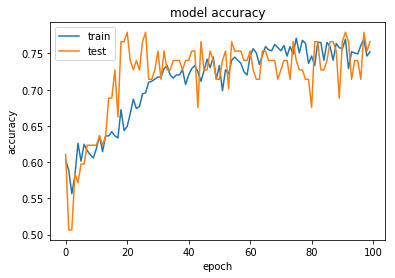

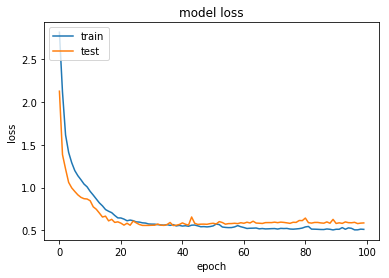

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
print('Last epoch:')
score = model.evaluate(x_test, y_test, verbose=0)
print('\tTest loss:', score[0])
print('\tTest accuracy:', score[1])

Last epoch:
	Test loss: 0.5867366210206763
	Test accuracy: 0.7662337693301114


In [0]:
# print('Best model:')
# with open('models/modelsave-best-model', 'rb') as f:
#   best_model = pickle.load(f)
#   score = best_model.evaluate(X, Y, verbose=False)
#   print('\tOverall Loss:', score[0])
#   print('\tOverall Accuracy:', score[1])

In [0]:
best_model = load_model('models/modelcheckpoint-best')
score = best_model.evaluate(X, Y, verbose=False)
print('\tOverall Loss:', score[0])
print('\tOverall Accuracy:', score[1])

	Overall Loss: 0.5237770828150087
	Overall Accuracy: 0.7535853967206575
